In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
class eps_bandit:
    def __init__(self, k, eps, iters, mu='random', q='random'):
        self.k = k
        self.eps = eps
        self.iters = iters
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:         
            self.mu = np.array(mu)
        elif mu =='random':
            self.mu = np.random.normal(1,0,k)
        if type(q) == list or type(q).__module__ == np.__name__:         
            self.q = np.array(q)
        elif q =='random':
            self.q = [0,2]
    
    def pull(self):
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            a = np.random.choice(self.k)
        else:
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], q[a])
     
        
        self.n += 1
        self.k_n[a] += 1
        
        self.mean_reward = self.mean_reward + (np.log(reward+4) - self.mean_reward) / self.n
        self.k_reward[a] = self.k_reward[a] + (np.log(reward+4) - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        self.n = 0
        self.k_n = np.zeros(k+1)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k+1)
        
            
            
        

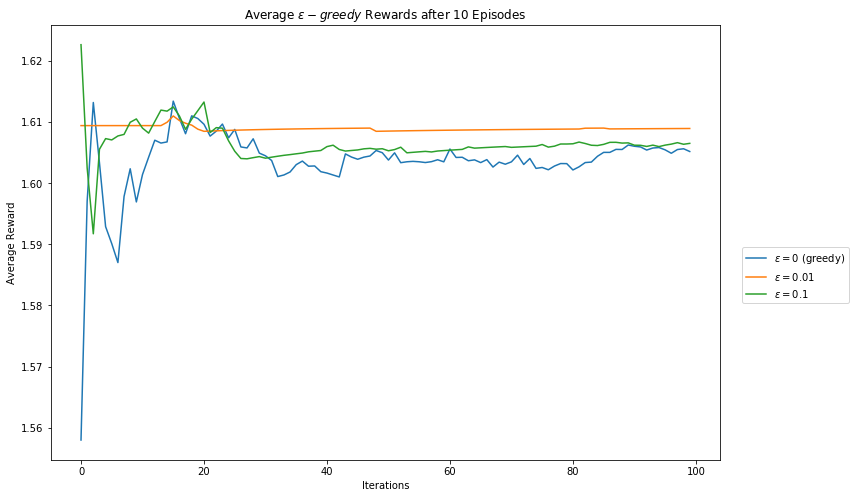

In [76]:
k = 2
iters = 100

eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

episodes = 10
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters)
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

In [31]:
x = np.random.normal(1,0)
x

1.0

In [60]:
k=2
x=np.random.choice(k)
x

0